In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Train.csv")

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [5]:
df['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [6]:
df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [7]:
df['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [8]:
df['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [9]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [10]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [11]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace(r'low fat','Low Fat')

In [12]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace(r'LF','Low Fat')

In [13]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace(r'reg','Regular')

In [14]:
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [15]:
df.shape

(8523, 12)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
df_var = df.select_dtypes("O").keys()
df_var

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [19]:
# df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
for var in df_var:
    df[var].fillna(df[var].mode()[0],inplace=True)

In [20]:
df_int = df.select_dtypes("float64").keys()
df_int

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

In [21]:
for var in df_int:
    df[var].fillna(df[var].mean(),inplace=True)

In [22]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [23]:
for var in df_int:
    df[var] = df[var].astype("int64")

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Item_Identifier            8523 non-null   object
 1   Item_Weight                8523 non-null   int64 
 2   Item_Fat_Content           8523 non-null   object
 3   Item_Visibility            8523 non-null   int64 
 4   Item_Type                  8523 non-null   object
 5   Item_MRP                   8523 non-null   int64 
 6   Outlet_Identifier          8523 non-null   object
 7   Outlet_Establishment_Year  8523 non-null   int64 
 8   Outlet_Size                8523 non-null   object
 9   Outlet_Location_Type       8523 non-null   object
 10  Outlet_Type                8523 non-null   object
 11  Item_Outlet_Sales          8523 non-null   int64 
dtypes: int64(5), object(7)
memory usage: 799.2+ KB


In [25]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9,Low Fat,0,Dairy,249,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5,Regular,0,Soft Drinks,48,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17,Low Fat,0,Meat,141,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19,Regular,0,Fruits and Vegetables,182,OUT010,1998,Medium,Tier 3,Grocery Store,732
4,NCD19,8,Low Fat,0,Household,53,OUT013,1987,High,Tier 3,Supermarket Type1,994
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6,Low Fat,0,Snack Foods,214,OUT013,1987,High,Tier 3,Supermarket Type1,2778
8519,FDS36,8,Regular,0,Baking Goods,108,OUT045,2002,Medium,Tier 2,Supermarket Type1,549
8520,NCJ29,10,Low Fat,0,Health and Hygiene,85,OUT035,2004,Small,Tier 2,Supermarket Type1,1193
8521,FDN46,7,Regular,0,Snack Foods,103,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845


In [26]:
df_var

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [27]:
df1 = df.copy()

In [28]:
val1 = df1['Item_Identifier'].unique()
for num,var in enumerate(val1):
    num+=1
    df1['Item_Identifier'].replace(var,num,inplace=True)

In [29]:
val2 = df1['Item_Fat_Content'].unique()
for num,var in enumerate(val2):
    num+=1
    df1['Item_Fat_Content'].replace(var,num,inplace=True)

In [30]:
val3 = df1['Item_Type'].unique()
for num,var in enumerate(val3):
    num+=1
    df1['Item_Type'].replace(var,num,inplace=True)

In [31]:
val4 = df1['Outlet_Identifier'].unique()
for num,var in enumerate(val4):
    num+=1
    df1['Outlet_Identifier'].replace(var,num,inplace=True)

In [32]:
val5 = df1['Outlet_Size'].unique()
for num,var in enumerate(val5):
    num+=1
    df1['Outlet_Size'].replace(var,num,inplace=True)

In [33]:
val6 = df1['Outlet_Location_Type'].unique()
for num,var in enumerate(val6):
    num+=1
    df1['Outlet_Location_Type'].replace(var,num,inplace=True)

In [34]:
val7 = df1['Outlet_Type'].unique()
for num,var in enumerate(val7):
    num+=1
    df1['Outlet_Type'].replace(var,num,inplace=True)

In [35]:
df2 = df.copy()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in df2:
    if df2[x].dtypes == 'object':
        df2[x] = le.fit_transform(df2[x])

In [36]:
df3 = df.copy()
df4 = pd.get_dummies(df3)

In [37]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Columns: 1602 entries, Item_Weight to Outlet_Type_Supermarket Type3
dtypes: int64(5), uint8(1597)
memory usage: 13.3 MB


In [38]:
df4.shape

(8523, 1602)

In [39]:
df4.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9,0,249,1999,3735,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5,0,48,2009,443,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17,0,141,1999,2097,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19,0,182,1998,732,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,0
4,8,0,53,1987,994,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [40]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Item_Identifier            8523 non-null   int64
 1   Item_Weight                8523 non-null   int64
 2   Item_Fat_Content           8523 non-null   int64
 3   Item_Visibility            8523 non-null   int64
 4   Item_Type                  8523 non-null   int64
 5   Item_MRP                   8523 non-null   int64
 6   Outlet_Identifier          8523 non-null   int64
 7   Outlet_Establishment_Year  8523 non-null   int64
 8   Outlet_Size                8523 non-null   int64
 9   Outlet_Location_Type       8523 non-null   int64
 10  Outlet_Type                8523 non-null   int64
 11  Item_Outlet_Sales          8523 non-null   int64
dtypes: int64(12)
memory usage: 799.2 KB


In [41]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Item_Identifier            8523 non-null   int32
 1   Item_Weight                8523 non-null   int64
 2   Item_Fat_Content           8523 non-null   int32
 3   Item_Visibility            8523 non-null   int64
 4   Item_Type                  8523 non-null   int32
 5   Item_MRP                   8523 non-null   int64
 6   Outlet_Identifier          8523 non-null   int32
 7   Outlet_Establishment_Year  8523 non-null   int64
 8   Outlet_Size                8523 non-null   int32
 9   Outlet_Location_Type       8523 non-null   int32
 10  Outlet_Type                8523 non-null   int32
 11  Item_Outlet_Sales          8523 non-null   int64
dtypes: int32(7), int64(5)
memory usage: 566.1 KB


In [42]:
df1.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9,1,0,1,249,1,1999,1,1,1,3735
1,2,5,2,0,2,48,2,2009,1,2,2,443
2,3,17,1,0,3,141,1,1999,1,1,1,2097
3,4,19,2,0,4,182,3,1998,1,2,3,732
4,5,8,1,0,5,53,4,1987,2,2,1,994


In [43]:
df2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9,0,0,4,249,9,1999,1,0,1,3735
1,8,5,1,0,14,48,3,2009,1,2,2,443
2,662,17,0,0,10,141,9,1999,1,0,1,2097
3,1121,19,1,0,6,182,0,1998,1,2,0,732
4,1297,8,0,0,9,53,1,1987,0,2,1,994


In [44]:
cols = df1.drop('Item_Outlet_Sales',axis=1)

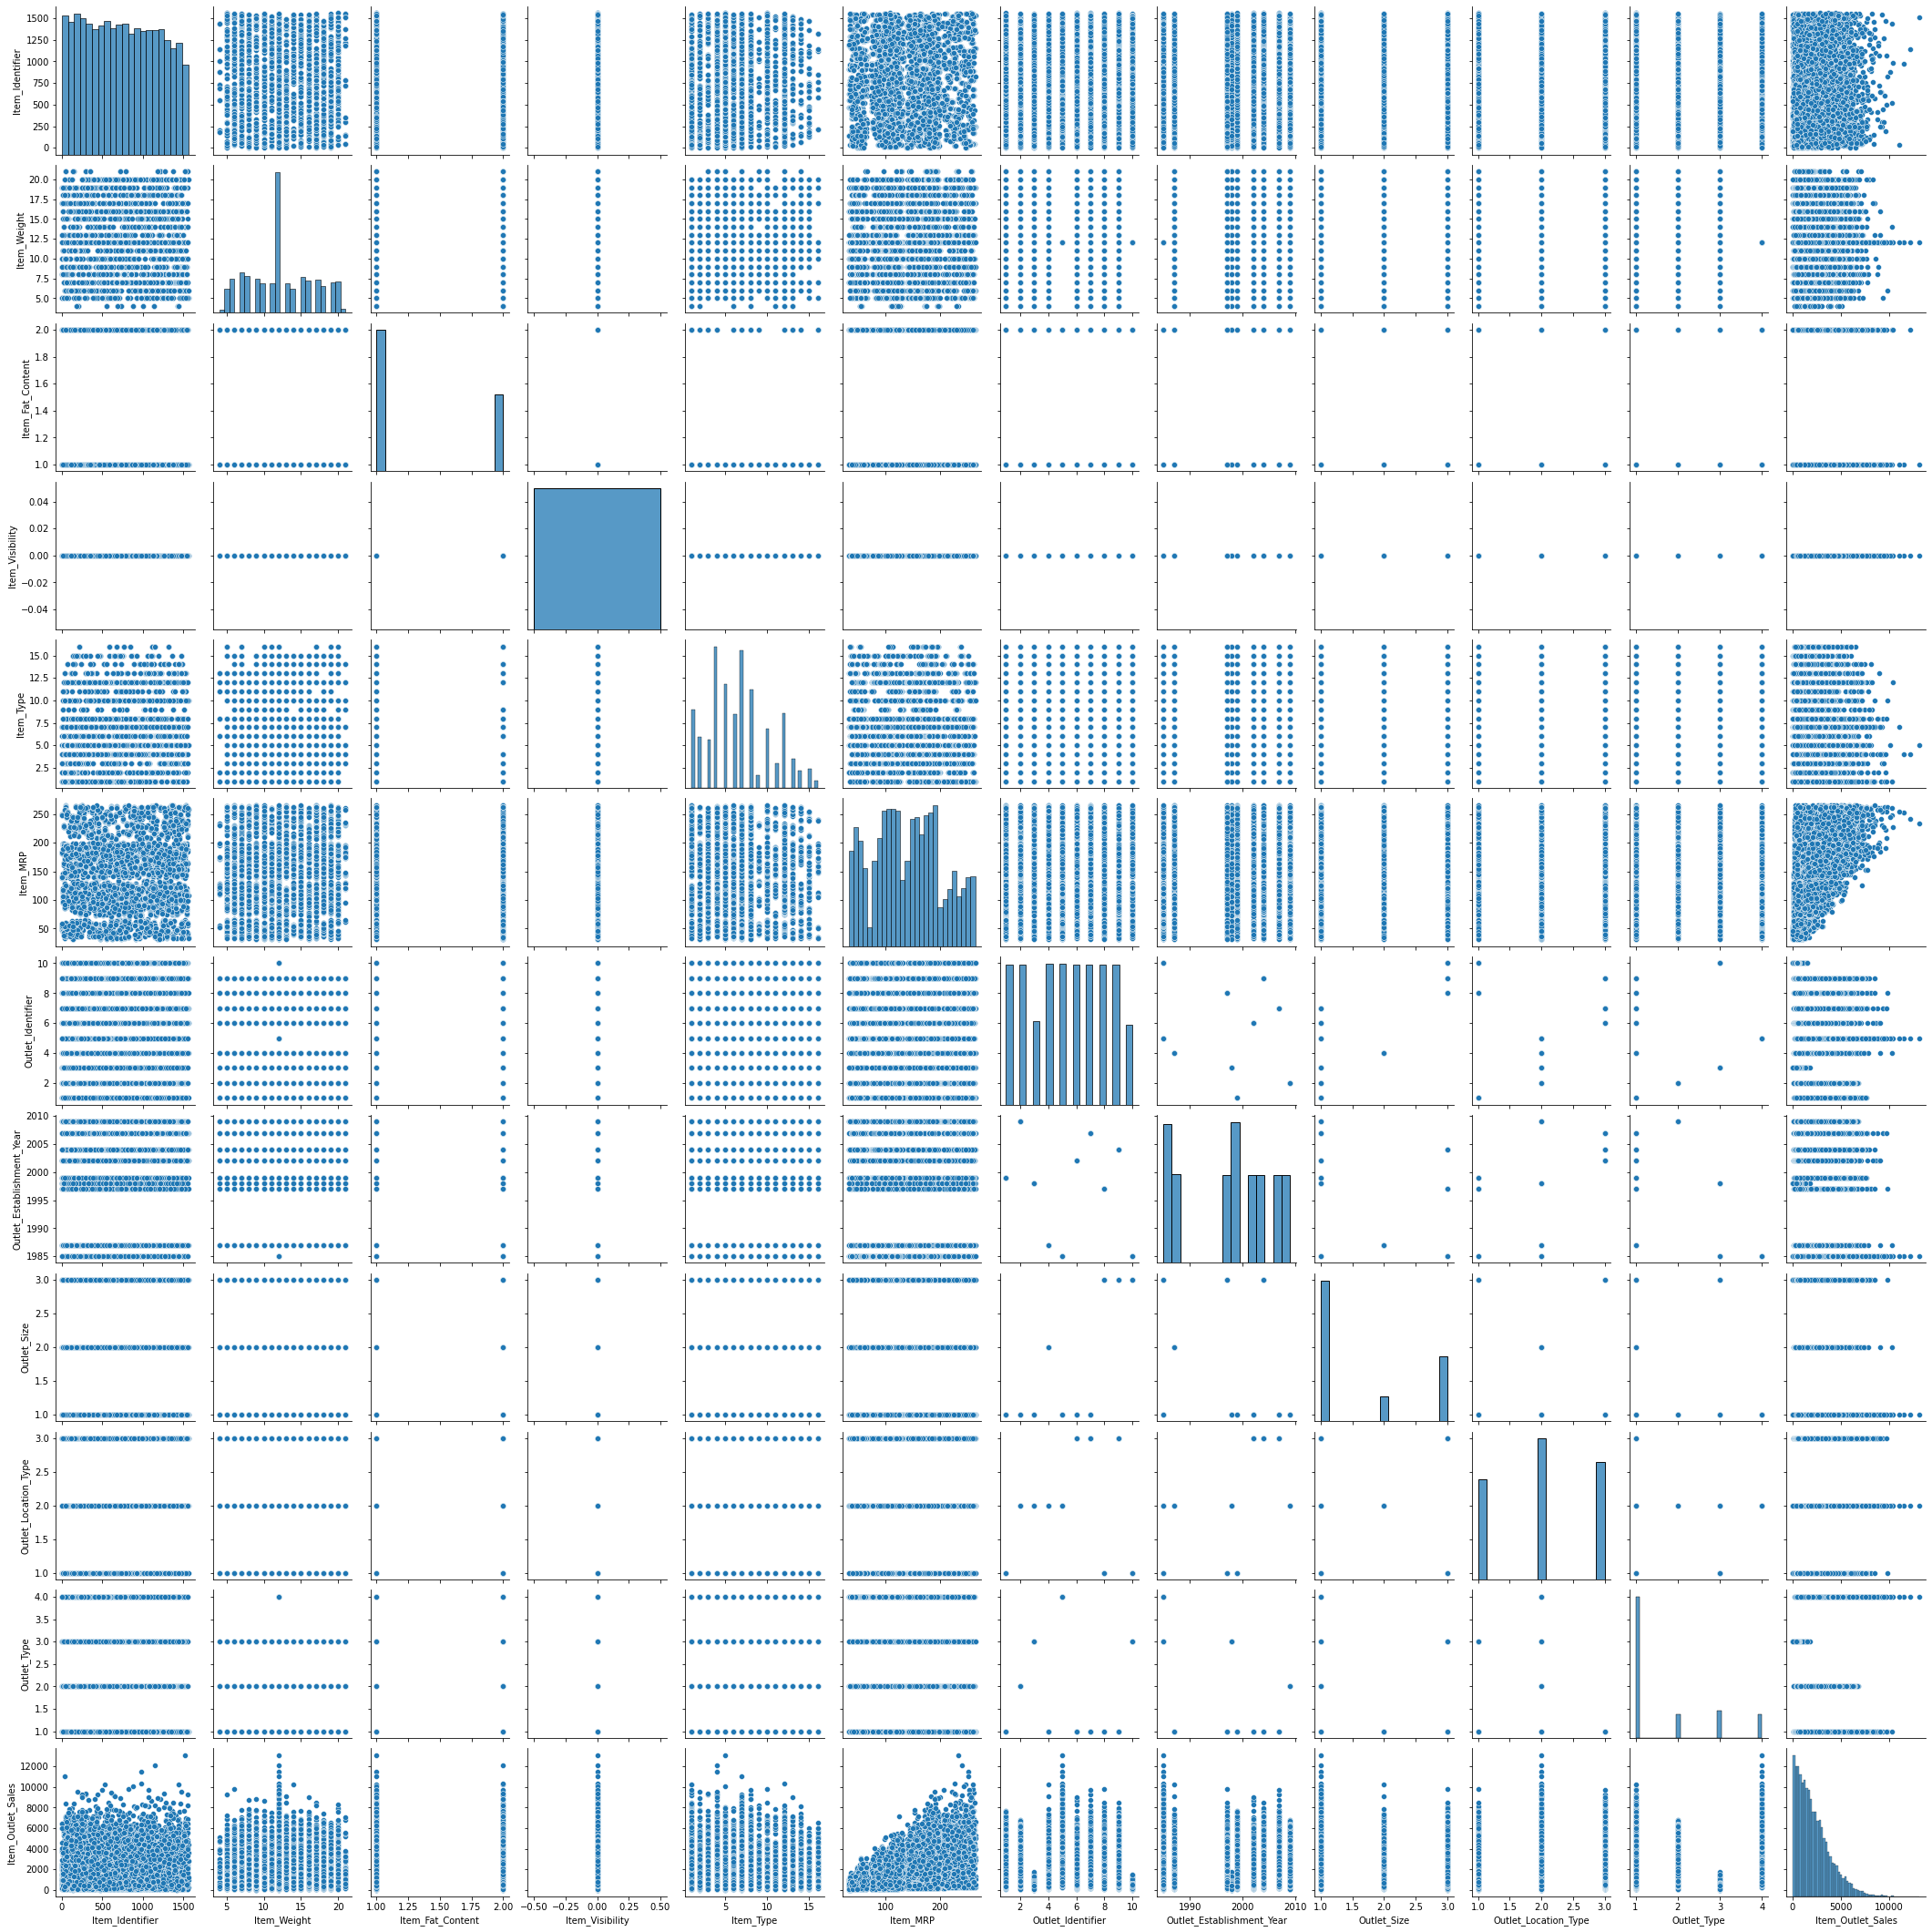

In [45]:
sns.pairplot(df1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


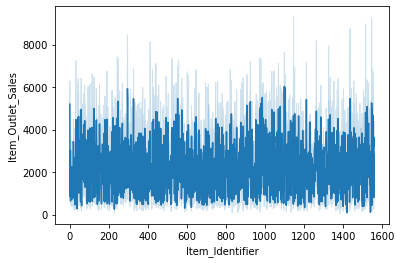

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


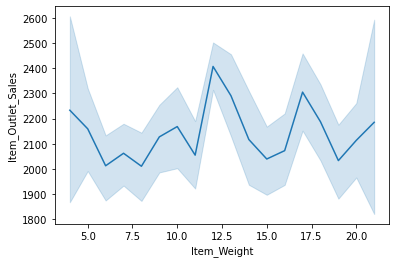

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


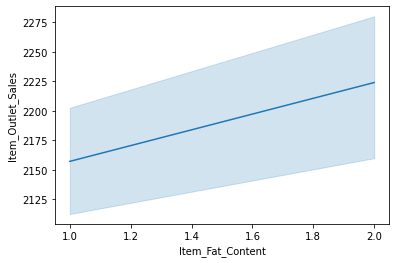

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


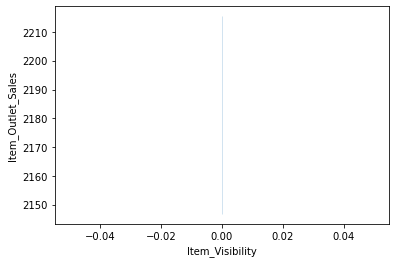

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


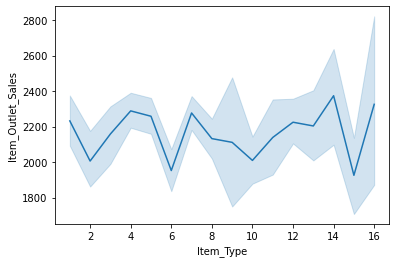

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


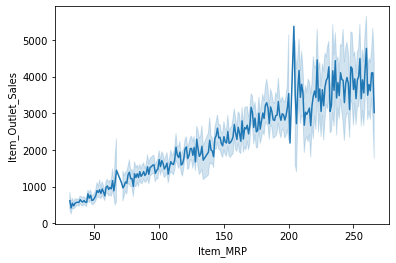

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


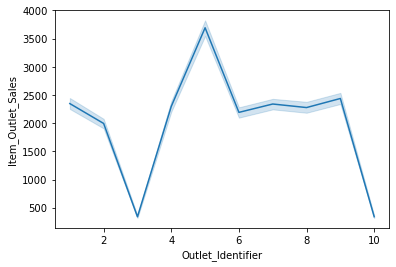

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


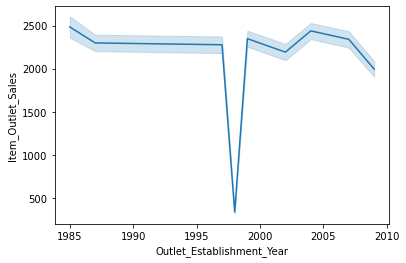

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


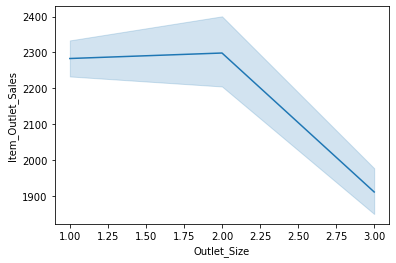

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


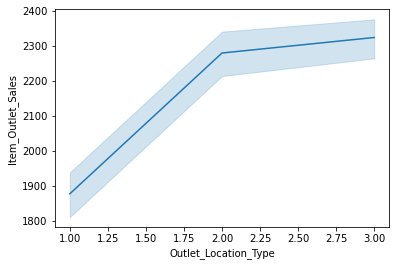

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


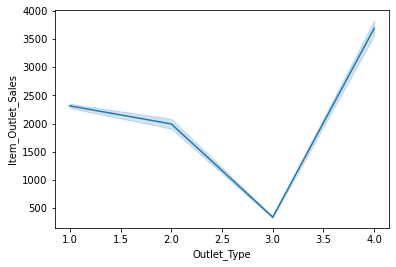

In [46]:
for x in cols:
    sns.lineplot(df1[x],df1['Item_Outlet_Sales'])
    plt.show()

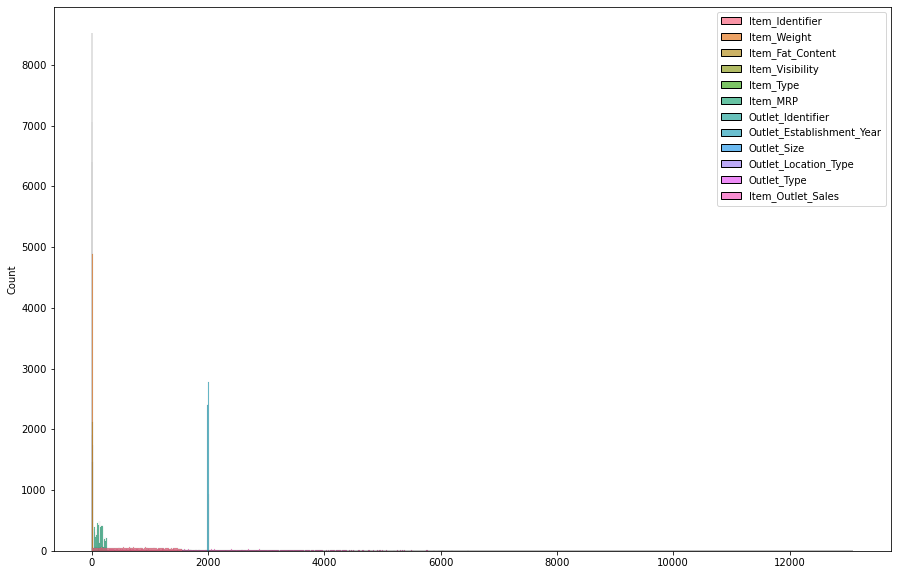

In [47]:
plt.figure(figsize=(15,10))
sns.histplot(df1)
plt.show()

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df4.corr(),annot=True, cmap='RdYlGn')
plt.show()

In [ ]:
X = df1.drop(['Item_Outlet_Sales','Item_Visibility'],axis=1)
y = df1['Item_Outlet_Sales']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=456)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)
lr.score(X_test,y_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
y_pred2 = dt.predict(X_test)
dt.score(X_test,y_test)

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(X_train,y_train)
y_pred3 = svr.predict(X_test)
svr.score(X_test,y_test)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred4 = rfr.predict(X_test)
rfr.score(X_test,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(X_test,y_test)
y_pred5 = knr.predict(X_test)
knr.score(X_test,y_test)

In [ ]:
df1.columns

In [ ]:
import joblib

In [ ]:
joblib.dump(rfr,"Item_outlet_saleprice.pkl")

In [ ]:
model = joblib.load('Item_outlet_saleprice.pkl')

In [ ]:
df_var

In [ ]:
def Item_outlet_saleprice(Item_Identifier, Item_Weight, Item_Fat_Content, Item_Type, Item_MRP, 
                          Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type):
   
    for num,var in enumerate(val1):
        if var == Item_Identifier:
            Item_Identifier = num
    for num,var in enumerate(val2):
        if var == Item_Fat_Content:
            Item_Fat_Content = num
    for num,var in enumerate(val3):
        if var == Item_Type:
            Item_Type = num
    for num,var in enumerate(val4):
        if var == Outlet_Identifier:
            Outlet_Identifier = num
    for num,var in enumerate(val5):
        if var == Outlet_Size:
            Outlet_Size = num
    for num,var in enumerate(val6):
        if var == Outlet_Location_Type:
            Outlet_Location_Type = num
    for num,var in enumerate(val7):
        if var == Outlet_Type:
            Outlet_Type = num
            
    x = np.zeros(len(X.columns))
    
    x[0] = Item_Identifier
    x[1] = Item_Weight
    x[2] = Item_Fat_Content
    x[3] = Item_Type
    x[4] = Item_MRP
    x[5] = Outlet_Identifier
    x[6] = Outlet_Establishment_Year
    x[7] = Outlet_Size
    x[8] = Outlet_Location_Type
    x[9] = Outlet_Type

    
    return model.predict([x])[0]
    
    